In [1]:
# improts
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
from glob import glob
import pickle
import shutil
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

In [2]:
mol = Chem.MolFromMolFile(
        "/home/magstr/Documents/nitrogenase/schrock/diagrams_schrock/schrock_dft/Mo_N2/ams.results/traj.mol", sanitize = False, removeHs=False)

# Initialize substructure string

# : matches aromatic bonds. Not == when it is delocalized
# '[c]:[c][N]'
# Smart for a nitrogen bound to aromatic carbon.
smart = '[c][N]'

patt = Chem.MolFromSmarts(smart)
print(Chem.MolToSmiles(patt), Chem.MolToSmiles(mol))

# Get indice of the carbon atom
print(f'Has substructure match: {mol.HasSubstructMatch(patt)}')
indices = mol.GetSubstructMatches(patt)
print(f'Match at indices {indices}')

Chem.Draw.MolToImage(mol, size=(500, 500))

frag = Chem.FragmentOnBonds(mol, [117])
Chem.Draw.MolToImage(frag, size=(800, 800))
frags = Chem.GetMolFrags(frag,asMols=True,sanitizeFrags=False)
Chem.Draw.MolToImage(frags[0], size=(800, 800))

OSError: Bad input file /home/magstr/Documents/nitrogenase/schrock/diagrams_schrock/schrock_dft/Mo_N2/ams.results/traj.mol

In [3]:
frag = Chem.FragmentOnBonds(mol, [117])

NameError: name 'mol' is not defined

In [4]:
Chem.Draw.MolToImage(frag, size=(800, 800))

NameError: name 'frag' is not defined

In [5]:
frags = Chem.GetMolFrags(frag,asMols=True,sanitizeFrags=False)

NameError: name 'frag' is not defined

In [6]:
frags[1]

NameError: name 'frags' is not defined

In [7]:
frags[0]

NameError: name 'frags' is not defined

In [8]:
Chem.Draw.MolToImage(frags[0], size=(800, 800))

NameError: name 'frags' is not defined

In [9]:
Draw.MolsToGridImage(frags)

NameError: name 'frags' is not defined

In [10]:
Chem.Draw.MolToImage(frags[1], size=(800, 800))

NameError: name 'frags' is not defined

Has substructure match: True


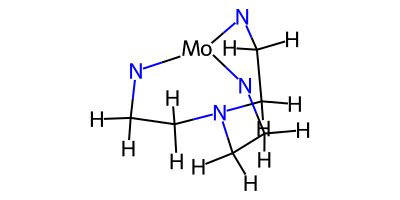

In [75]:
# Load intermediate
mol = Chem.MolFromMolFile(
    "/home/magstr/Documents/nitrogenase/schrock/diagrams_schrock/dft/cycle_restart/Mo/ams.results/traj.mol", sanitize = False, removeHs=False)

#mol.GetAtomWithIdx(269).SetFormalCharge(1)
mol.UpdatePropertyCache()
# Initialize substructure string

# : matches aromatic bonds. Not == when it is delocalized
# '[c]:[c][N]'
# Smart for a nitrogen bound to aromatic carbon.
smart = '[c][N]'

# Initialize pattern
patt = Chem.MolFromSmarts(smart)

# Substructure match
print(f'Has substructure match: {mol.HasSubstructMatch(patt)}')
indices = mol.GetSubstructMatches(patt)

# Visualize
#im = Chem.Draw.MolToImage(mol, size=(800, 800))
#im.show()
bonds=[]
# Cut the bonds between the nitrogen and the carbon.
for tuple in indices:
    # Get bond number
    bonds.append(mol.GetBondBetweenAtoms(tuple[0], tuple[1]).GetIdx())

# Cut
frag = Chem.FragmentOnBonds(mol, bonds,addDummies=False)

#Draw cut
#Chem.Draw.MolToImage(frag, size=(800, 800))

# Split mol object into individual fragments. sanitizeFrags needs to be false, otherwise not work.
frags = Chem.GetMolFrags(frag, asMols=True, sanitizeFrags=False)

final = Chem.RemoveHs(frags[1])
Chem.Draw.MolToImage(frags[1], size=(400, 200))



In [52]:
indices

((8, 12), (41, 40), (70, 14))

### Try to replace nitrogen with dummy instead

In [19]:
# This doesnt work if valenve is not filled for N. Eg if not dummy atoms are added
#Draw.MolsToGridImage(frags)

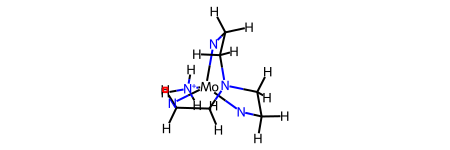

In [ ]:
frags[1]

In [72]:
# Print dummy
# Save frag to file
templates = '../templates/'
with open(templates+'core_NH3_final.sdf', 'w+') as f:
    f.write(Chem.MolToMolBlock(frags[1]))


In [12]:
# Convert dummy to hydrogen. Label possibly still persists
for a in frags[1].GetAtoms():
    if a.GetSymbol() == '*':
        a.SetAtomicNum(1)
templates = '../templates/'
        
# Save frag to file
with open(templates+'core_noHS.sdf', 'w+') as f:
    f.write(Chem.MolToMolBlock(frags[1]))

## Save frag to file
#with open('templates/HIPT.mol', 'w+') as f:
#    f.write(Chem.MolToMolBlock(frags[0]))

In [13]:
# Replace dummy atoms
for a in frags[1].GetAtoms():
    if a.GetSymbol() == '*':
        a.SetAtomicNum(1)
        print('Dummy replaced')

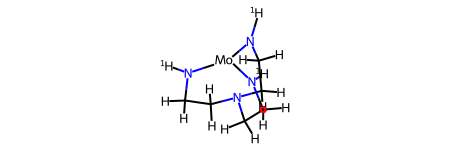

In [14]:
frags[1]

RDKit WARNING: [15:57:19] WARNING: not removing hydrogen atom without neighbors
[15:57:19] WARNING: not removing hydrogen atom without neighbors


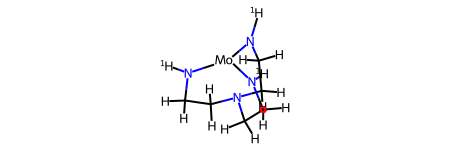

In [15]:
# Alternative way to replace dummy? 
mod_mol = Chem.ReplaceSubstructs(frags[1],
                                 Chem.MolFromSmiles('[1*]'),
                                 Chem.MolFromSmiles('[H]'))
mod_mol[0]

In [ ]:
# Substructure match to find the fragment with the core
# Smart for a nitrogen bound to aromatic carbon.
smart = "[Mo]"

# Initialize pattern
patt = Chem.MolFromSmarts(smart)

# Substructure match
for idx,struct in enumerate(frags):
    if struct.HasSubstructMatch(patt):
        print(f"Found the molybdenum core: {idx}")
        break

## Mo_NH3 struct for GA template

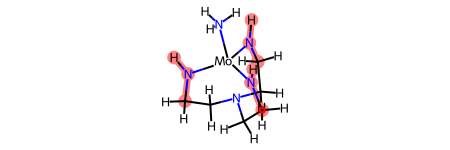

In [5]:
mol

Has substructure match: True


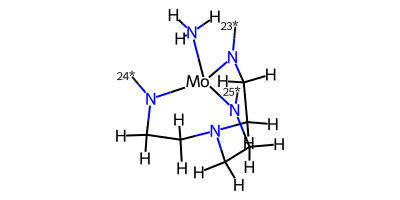

In [22]:
# Load intermediate
mol = Chem.MolFromMolFile(
    "../templates/core_NH3.mol", sanitize = False, removeHs=False)

# Initialize substructure string

# : matches aromatic bonds. Not == when it is delocalized
# '[c]:[c][N]'
# Smart for a nitrogen bound to aromatic carbon.
smart = '[H][N][C]'

# Initialize pattern
patt = Chem.MolFromSmarts(smart)

# Substructure match
print(f'Has substructure match: {mol.HasSubstructMatch(patt)}')
indices = mol.GetSubstructMatches(patt)

# Visualize
#im = Chem.Draw.MolToImage(mol, size=(800, 800))
#im.show()
bonds=[]
# Cut the bonds between the nitrogen and the carbon.
for tuple in indices:
    # Get bond number
    bonds.append(mol.GetBondBetweenAtoms(tuple[0], tuple[1]).GetIdx())

# Cut
frag = Chem.FragmentOnBonds(mol, bonds,addDummies=True)

#Draw cut
#Chem.Draw.MolToImage(frag, size=(800, 800))

# Split mol object into individual fragments. sanitizeFrags needs to be false, otherwise not work.
frags = Chem.GetMolFrags(frag, asMols=True, sanitizeFrags=False)

Chem.Draw.MolToImage(frags[0], size=(400, 200))



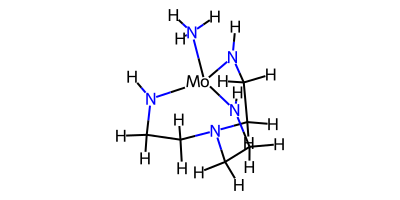

In [23]:
Chem.Draw.MolToImage(mol, size=(400, 200))

### Try to replace nitrogen with dummy instead

In [13]:
# This doesnt work if valenve is not filled for N. Eg if not dummy atoms are added
#Draw.MolsToGridImage(frags)

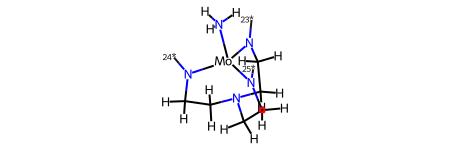

In [24]:
frags[0]

In [20]:
# Convert dummy to hydrogen. Label possibly still persists
for a in frags[0].GetAtoms():
    if a.GetSymbol() == '*':
        a.SetAtomicNum(0)

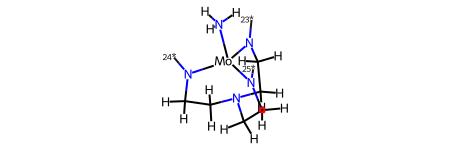

In [29]:
frags[0]

In [28]:
# Print dummy
# Save frag to file
templates = '../templates/'
with open(templates+'core_NH3_dummy.mol', 'w+') as f:
    f.write(Chem.MolToMolBlock(frags[0]))


In [38]:
file_NH3 = "../templates/core_NH3_dummy.mol"
core_NH3 = Chem.SDMolSupplier(file_NH3, removeHs=False, sanitize=False)

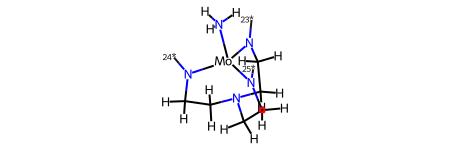

In [39]:
core_NH3[0]

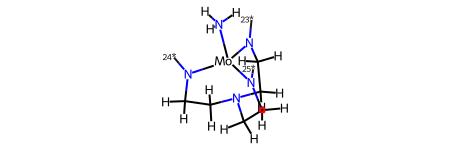

In [40]:
core_NH3[0]

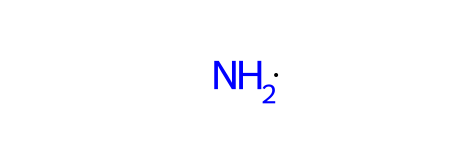

In [37]:
Chem.MolFromSmiles('[N]([H])[H]')

In [16]:
prim_amine_index = Chem.MolFromSmiles('[NH3]').GetSubstructMatches(
        Chem.MolFromSmarts("[NX3;H2;!+1]")
    )

In [17]:
a = prim_amine_index

In [18]:
a

()

In [10]:
a = ((0),)

In [19]:
# Load intermediate
mol = Chem.MolFromMolFile(
    "../templates/core_NH3.mol", sanitize = False, removeHs=False)

# Initialize substructure string

# : matches aromatic bonds. Not == when it is delocalized
# '[c]:[c][N]'
# Smart for a nitrogen bound to aromatic carbon.
smart = '[H][N][C]'

# Initialize pattern
patt = Chem.MolFromSmarts(smart)

# Substructure match
print(f'Has substructure match: {mol.HasSubstructMatch(patt)}')
indices = mol.GetSubstructMatches(patt)

Has substructure match: True


In [26]:
b = mol.GetSubstructMatches(patt)

In [32]:
a = ((0),)

In [34]:
a[0][0]

TypeError: 'int' object is not subscriptable

In [25]:
a[0][0]

TypeError: 'int' object is not subscriptable

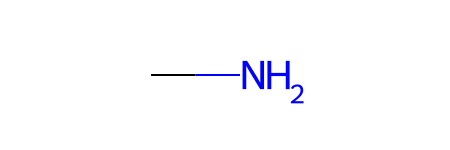

In [36]:
Chem.MolFromSmiles('CN')